PIGS ANALYSIS NOTEBOOK  
Patrick M. Donnelly  
University of Washington  
August 6th, 2018  

In [1]:
# import necessary databases and libraries
import pycurl,json,requests,sys,os
import pandas as pd
import numpy as np
# existing redcap API stipulates StringIO, but pycurl now works with BytesIO
from io import BytesIO

In [2]:
# get api token
# if you need an access token, consult the RedCap API page
home = os.path.expanduser('~')
with open (home+"/Desktop/redcap_apitoken_repo.txt", "r") as myfile:
    token=myfile.read().split()

In [3]:
# say which report you want
# report 27719 is the report in the screening database called "pigs_data"
report = {
    'token': token,
    'content': 'report',
    'format': 'csv',
    'report_id': '27719',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'csv'
}

In [4]:
# specify API address
redcap_path = 'https://redcap.iths.org/api/'
# use requests module to pull data from database using api token
# and convert to csv
pull_pigs = requests.post(redcap_path, data=report)
report_filename =os.path.join(home+'/Downloads/pigs_data.csv')
with open(report_filename, 'w') as report_file:
        report_file.write(pull_pigs.text)
pigs_data = pd.read_csv(report_filename)
visit1 = pigs_data[pigs_data['study_name'] == 41]
visit2 = pigs_data[pigs_data['study_name'] == 42]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress

In [6]:
for ii in range(0, len(pigs_data['record_id'])):
    if pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/237
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/237
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/223
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/223
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/301
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/301
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/300
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/300
    elif pigs_data['study_name'][ii] == 41 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/301
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/301
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/300
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/300
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/237
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/237
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/223
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/223
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 0 or pigs_data['pigs_group'][ii] == 2):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/259
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/259
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/258
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/258
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/359
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/359
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/333
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/333    
    elif pigs_data['study_name'][ii] == 42 and (pigs_data['pigs_group'][ii] == 1 or pigs_data['pigs_group'][ii] == 3):
            pigs_data.loc[ii,'pigs_p1_r1_acc'] = pigs_data.loc[ii,'pigs_p1_r1_acc']/359
            pigs_data.loc[ii,'pigs_p1_r2_acc'] = pigs_data.loc[ii,'pigs_p1_r2_acc']/359
            pigs_data.loc[ii,'pigs_p2_r1_acc'] = pigs_data.loc[ii,'pigs_p2_r1_acc']/333
            pigs_data.loc[ii,'pigs_p2_r2_acc'] = pigs_data.loc[ii,'pigs_p2_r2_acc']/333
            pigs_data.loc[ii,'pigs_p3_r1_acc'] = pigs_data.loc[ii,'pigs_p3_r1_acc']/259
            pigs_data.loc[ii,'pigs_p3_r2_acc'] = pigs_data.loc[ii,'pigs_p3_r2_acc']/259
            pigs_data.loc[ii,'pigs_p4_r1_acc'] = pigs_data.loc[ii,'pigs_p4_r1_acc']/258
            pigs_data.loc[ii,'pigs_p4_r2_acc'] = pigs_data.loc[ii,'pigs_p4_r2_acc']/258

In [7]:
pigs_data['short_first_time'] = np.nan
pigs_data['short_first_acc']  = np.nan
pigs_data['short_first_rate']  = np.nan
pigs_data['long_first_time']  = np.nan
pigs_data['long_first_acc']  = np.nan
pigs_data['long_first_rate']  = np.nan
pigs_data['short_second_time']  = np.nan
pigs_data['short_second_acc'] = np.nan
pigs_data['short_second_rate'] = np.nan
pigs_data['long_second_time'] = np.nan
pigs_data['long_second_acc'] = np.nan
pigs_data['long_second_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
#    if pigs_data['pigs_group'][ii] == 'A1' or 'B1':
        pigs_data.loc[ii,'short_first_time'] = np.mean([pigs_data['pigs_p1_r1_time'][ii], pigs_data['pigs_p2_r1_time'][ii]])
        pigs_data.loc[ii,'short_first_acc'] = np.mean([pigs_data['pigs_p1_r1_acc'][ii], pigs_data['pigs_p2_r1_acc'][ii]])
        pigs_data.loc[ii,'short_first_rate'] = np.mean([pigs_data['pigs_p1_r1_rate'][ii], pigs_data['pigs_p2_r1_rate'][ii]])
        pigs_data.loc[ii,'long_first_time'] = np.mean([pigs_data['pigs_p3_r1_time'][ii], pigs_data['pigs_p4_r1_time'][ii]])
        pigs_data.loc[ii,'long_first_acc'] = np.mean([pigs_data['pigs_p3_r1_acc'][ii], pigs_data['pigs_p4_r1_acc'][ii]])
        pigs_data.loc[ii,'long_first_rate'] = np.mean([pigs_data['pigs_p3_r1_rate'][ii], pigs_data['pigs_p4_r1_rate'][ii]])
        
        pigs_data.loc[ii,'short_second_time'] = np.mean([pigs_data['pigs_p1_r2_time'][ii], pigs_data['pigs_p2_r2_time'][ii]])
        pigs_data.loc[ii,'short_second_acc'] = np.mean([pigs_data['pigs_p1_r2_acc'][ii], pigs_data['pigs_p2_r2_acc'][ii]])
        pigs_data.loc[ii,'short_second_rate'] = np.mean([pigs_data['pigs_p1_r2_rate'][ii], pigs_data['pigs_p2_r2_rate'][ii]])
        pigs_data.loc[ii,'long_second_time'] = np.mean([pigs_data['pigs_p3_r2_time'][ii], pigs_data['pigs_p4_r2_time'][ii]])
        pigs_data.loc[ii,'long_second_acc'] = np.mean([pigs_data['pigs_p3_r2_acc'][ii], pigs_data['pigs_p4_r2_acc'][ii]])
        pigs_data.loc[ii,'long_second_rate'] = np.mean([pigs_data['pigs_p3_r2_rate'][ii], pigs_data['pigs_p4_r2_rate'][ii]])


In [8]:
pigs_data['word_time'] = np.nan
pigs_data['word_acc'] = np.nan
pigs_data['word_rate'] = np.nan
pigs_data['pseudo_time'] = np.nan
pigs_data['pseudo_acc'] = np.nan
pigs_data['pseudo_rate'] = np.nan

for ii in range(0, len(pigs_data['record_id'])):
    pigs_data.loc[ii, 'word_time'] = np.mean([pigs_data['pigs_word1_time'][ii], pigs_data['pigs_word2_time'][ii]])
    pigs_data.loc[ii, 'word_acc'] = np.mean([pigs_data['pigs_word1_acc'][ii], pigs_data['pigs_word2_acc'][ii]])
    pigs_data.loc[ii, 'word_rate'] = np.mean([pigs_data['pigs_word1_rate'][ii], pigs_data['pigs_word2_rate'][ii]])
    pigs_data.loc[ii, 'pseudo_time'] = np.mean([pigs_data['pigs_pseudo1_time'][ii], pigs_data['pigs_pseudo2_time'][ii]])
    pigs_data.loc[ii, 'pseudo_acc'] = np.mean([pigs_data['pigs_pseudo1_acc'][ii], pigs_data['pigs_pseudo2_acc'][ii]])
    pigs_data.loc[ii, 'pseudo_rate'] = np.mean([pigs_data['pigs_pseudo1_rate'][ii], pigs_data['pigs_pseudo2_rate'][ii]])

for jj in range(1, len(pigs_data['record_id']), 2):
    pigs_data.loc[jj, 'word_acc_diff'] = pigs_data['word_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['word_acc'][pigs_data['study_name'] == 41][jj-1]
    pigs_data.loc[jj, 'pseudo_acc_diff'] = pigs_data['pseudo_acc'][pigs_data['study_name'] == 42][jj] - pigs_data['pseudo_acc'][pigs_data['study_name'] == 41][jj-1]

In [58]:
passage_data = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_time', 
                          'short_first_acc', 'short_first_rate', 'long_first_time', 
                          'long_first_acc','long_first_rate', 'short_second_time', 
                          'short_second_acc', 'short_second_rate', 
                          'long_second_time', 'long_second_acc', 'long_second_rate']]
wordlist_data = pigs_data[['pigs_casecontrol', 'study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
passage_accuracy = pigs_data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc','short_second_acc', 'long_second_acc']]
passage_rate = pigs_data[['pigs_casecontrol', 'study_name', 'short_first_rate', 
                          'long_first_rate', 'short_second_rate', 'long_second_rate']]
wordlist_acc_data = pigs_data[['record_id', 'int_session', 'pigs_casecontrol', 'study_name','pigs_word1_acc', 'pigs_word2_acc', 'pigs_pseudo1_acc', 'pigs_pseudo2_acc']]
wordlist_acc_diff_data = pigs_data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = pigs_data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]

In [10]:
acc_grouped = passage_accuracy.groupby(['pigs_casecontrol', 'study_name']).mean()

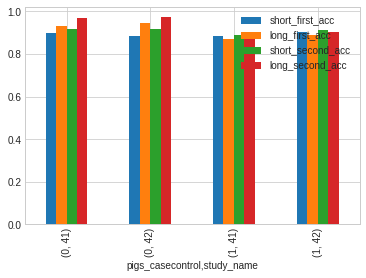

In [11]:
acc_grouped.plot(kind='bar',style='seaborn-whitegrid')

In [12]:
rate_grouped = passage_rate.groupby(['pigs_casecontrol', 'study_name']).mean()

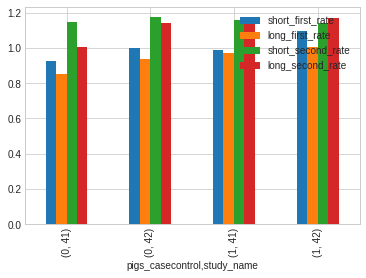

In [13]:
rate_grouped.plot(kind='bar')

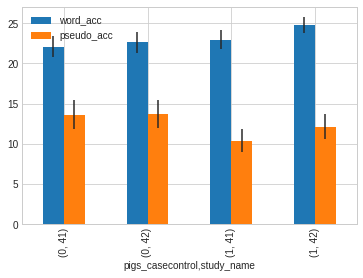

In [14]:
wordlist_acc_grouped = wordlist_acc_data.groupby(['pigs_casecontrol', 'study_name']).mean()
wl_acc_grpd_error = wordlist_acc_data.groupby(['pigs_casecontrol', 'study_name']).sem()
wordlist_acc_grouped.plot(kind='bar', yerr=wl_acc_grpd_error)

([<matplotlib.text.Text at 0x7f75443861d0>,
  <matplotlib.text.Text at 0x7f754438a240>],)

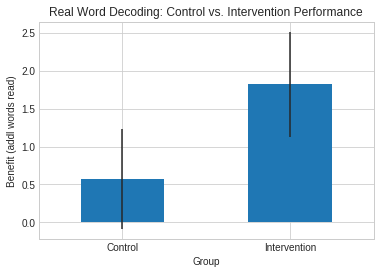

In [15]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].sem()
fig1 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, legend=False, title='Real Word Decoding: Control vs. Intervention Performance', rot=0)
fig1.set_xlabel('Group')
fig1.set_ylabel('Benefit (addl words read)')
fig1.set_xticklabels(['Control', 'Intervention']), 

([<matplotlib.text.Text at 0x7f75444c01d0>,
  <matplotlib.text.Text at 0x7f7544323358>],)

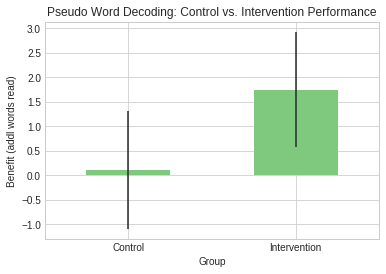

In [16]:
wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].sem()
fig2 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, legend=False, colormap='Accent', title='Pseudo Word Decoding: Control vs. Intervention Performance',rot=0)
fig2.set_xlabel('Group')
fig2.set_ylabel('Benefit (addl words read)')
fig2.set_xticklabels(['Control', 'Intervention']), 

In [22]:
wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff']

In [19]:
from scipy.stats import ttest_ind

In [43]:
word_cntrl = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
word_int = wordlist_acc_diff_data['word_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()
pseudo_cntrl = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 0].dropna()
pseudo_int = wordlist_acc_diff_data['pseudo_acc_diff'][wordlist_acc_diff_data['pigs_casecontrol'] == 1].dropna()

In [44]:
ttest_ind(word_int, word_cntrl)

Ttest_indResult(statistic=1.3086853057791181, pvalue=0.20167143830269982)

In [47]:
ttest_ind(pseudo_int, pseudo_cntrl)

Ttest_indResult(statistic=0.9767178039907003, pvalue=0.33737948379931104)

In [59]:
wordlist_acc_data.to_csv('/home/pdonnelly/Desktop/pigs_wordlist_data.csv')

In [57]:
pigs_data


,record_id,redcap_event_name,study_name,visit_researcher,visit_dt,int_session,int_time,int_days,int_hours,int_period,...,long_second_acc,long_second_rate,word_time,word_acc,word_rate,pseudo_time,pseudo_acc,pseudo_rate,word_acc_diff,pseudo_acc_diff
0,274,visit_4_arm_1,41,TM,2018-07-18 10:00,1,0.0,0.0,0.0,NaN,...,0.949755,0.6915,79.50,19.0,0.2405,93.5,11.0,0.1185,NaN,NaN
1,274,visit_5_arm_1,42,TM,2018-08-02 10:00,2,NaN,NaN,NaN,NaN,...,0.963231,0.9155,76.50,24.5,0.3385,76.5,17.5,0.2285,5.5,6.5
2,280,visit_2_arm_1,41,TM,2018-07-26 15:40,1,0.0,0.0,0.0,NaN,...,0.890216,0.3575,130.00,22.0,0.1710,299.0,15.5,0.0530,NaN,NaN
3,280,visit_3_arm_1,42,PD,2018-08-10 15:43,2,NaN,NaN,NaN,NaN,...,0.815052,0.4050,NaN,22.0,NaN,NaN,16.0,NaN,0.0,0.5
4,428,visit_4_arm_1,41,PD,2018-07-30 13:30,1,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,20.5,NaN,NaN,4.0,NaN,NaN,NaN
5,428,visit_5_arm_1,42,AJ,2018-08-14 13:30,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.5,NaN,NaN,6.0,NaN,0.0,2.0
6,429,visit_4_arm_1,41,EK,2018-07-30 13:30,1,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,21.5,NaN,NaN,9.0,NaN,NaN,NaN
7,429,visit_5_arm_1,42,PD,2018-08-14 13:30,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.0,NaN,NaN,9.0,NaN,2.5,0.0
8,486,visit_6_arm_1,41,TM,2018-07-23 10:00,1,0.0,0.0,0.0,NaN,...,0.931783,1.1160,33.50,26.5,0.8310,77.0,18.0,0.2350,NaN,NaN
9,486,visit_7_arm_1,42,TM,2018-08-07 09:00,2,NaN,NaN,NaN,NaN,...,0.948209,1.2940,34.00,25.0,0.7560,81.5,13.5,0.1720,-1.5,-4.5
